In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))

import matplotlib.pyplot as plt

from src.utils.dataset import train_test_load

from src.model.train import train_base, train_feat, train_variational

### Utils

In [2]:
def plot_results_4(results):
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    axs[0, 0].plot(results["train_loss"])
    axs[0, 0].set_xlabel("Iteration")
    axs[0, 0].set_ylabel("Train Loss")
    axs[0, 0].set_title("Training Loss at each iteration")
    axs[0, 0].grid(True, linestyle=":")
    
    axs[0, 1].plot(results["train_rmse"])
    axs[0, 1].set_xlabel("Iteration")
    axs[0, 1].set_ylabel("Train RMSE")
    axs[0, 1].set_title("Training RMSE at each iteration")
    axs[0, 1].grid(True, linestyle=":")
    
    axs[1, 0].plot(results["val_loss"], color="forestgreen")
    axs[1, 0].set_xlabel("Iteration")
    axs[1, 0].set_ylabel("Test Loss")
    axs[1, 0].set_title("Test Loss at each iteration")
    axs[1, 0].grid(True, linestyle=":")
    
    axs[1, 1].plot(results["val_rmse"], color="forestgreen")
    axs[1, 1].set_xlabel("Iteration")
    axs[1, 1].set_ylabel("Test RMSE")
    axs[1, 1].set_title("Test RMSE at each iteration")
    axs[1, 1].grid(True, linestyle=":")
    
    plt.tight_layout()
    plt.show()

def plot_results_2(results):
    fig, axs = plt.subplots(2, 1, figsize=(8, 8))

    axs[0].plot(results["train_loss"], label="Train loss")
    axs[0].plot(results["val_loss"], color="forestgreen", label="Test loss")
    axs[0].set_xlabel("Iteration")
    axs[0].set_ylabel("Loss")
    axs[0].set_title("Loss at each iteration")
    axs[0].grid(True, linestyle=":")
    axs[0].legend()
    
    axs[1].plot(results["train_rmse"], label="Train RMSE")
    axs[1].plot(results["val_rmse"], color="forestgreen", label="Test RMSE")
    axs[1].set_xlabel("Iteration")
    axs[1].set_ylabel("RMSE")
    axs[1].set_title("RMSE at each iteration")
    axs[1].grid(True, linestyle=":")
    axs[1].legend()
    
    plt.tight_layout()
    plt.show()

### Recommender

In [3]:
test_split = 0.2

train, test, metadata = train_test_load("../data/ml-latest-small/ratings.csv", "../data/ml-latest-small/movies.csv", test_split=test_split)

#### Bias Only

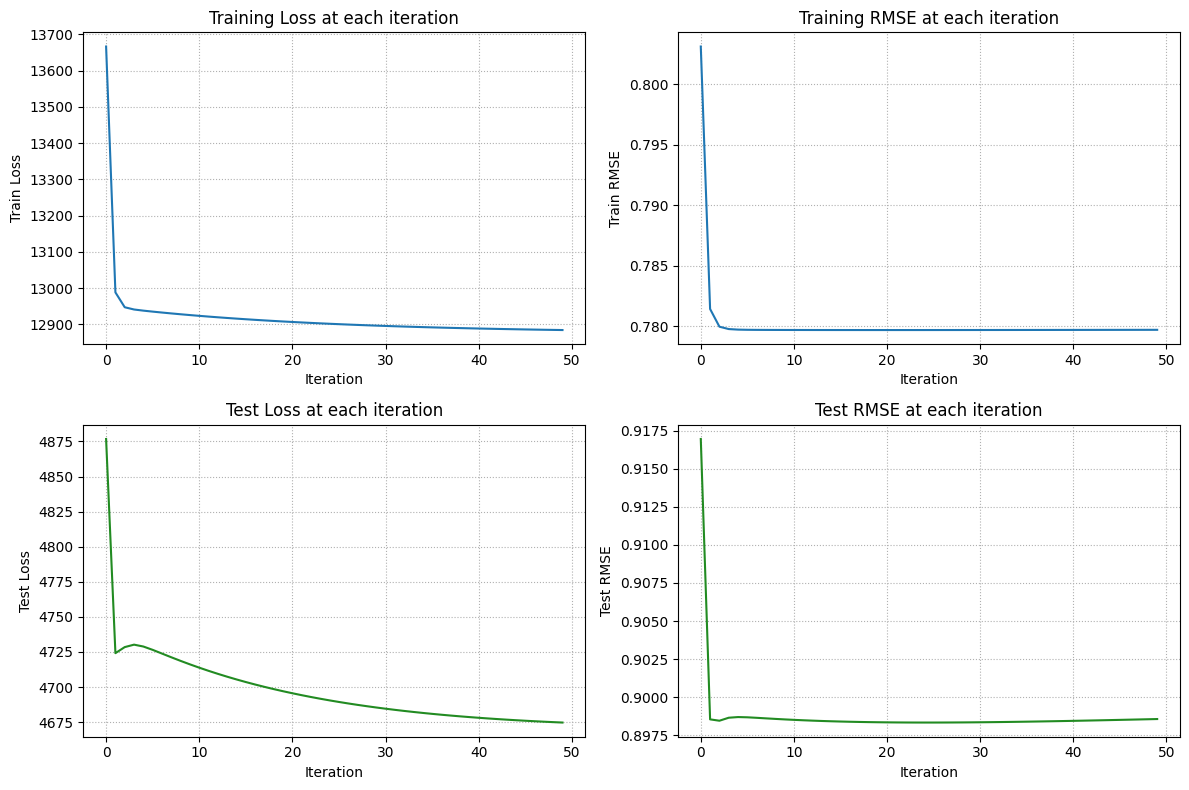

In [4]:
results = train_base(
    train, test,
    embedding_dim = 0, 
    r_lambda = 0.5, 
    r_gamma = 0.1, 
    r_tau = 0.1, 
    n_iter = 50,
)

plot_results_4(results)

#### With embedding

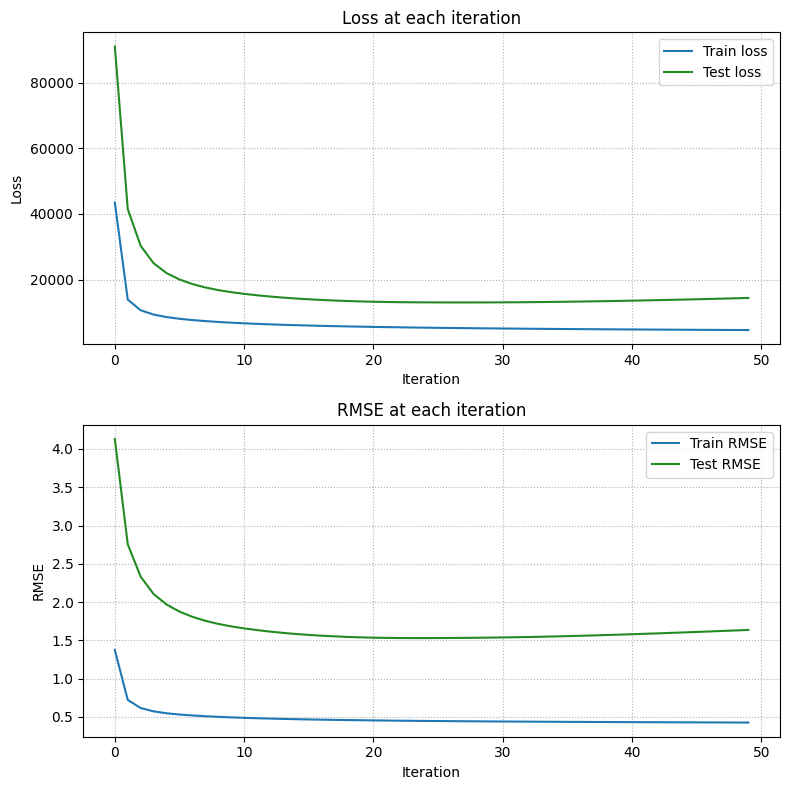

In [5]:
results = train_base(
    train, test,
    embedding_dim = 10, 
    r_lambda = 0.5, 
    r_gamma = 0.01, 
    r_tau = 0.01, 
    n_iter = 50,
)

plot_results_2(results)

### Recommender (with feature)

In [6]:
test_split = 0.2

train, test, metadata = train_test_load(
    "../data/ml-latest-small/ratings.csv",
    "../data/ml-latest-small/movies.csv",
    test_split=test_split,
    include_features=True,
)

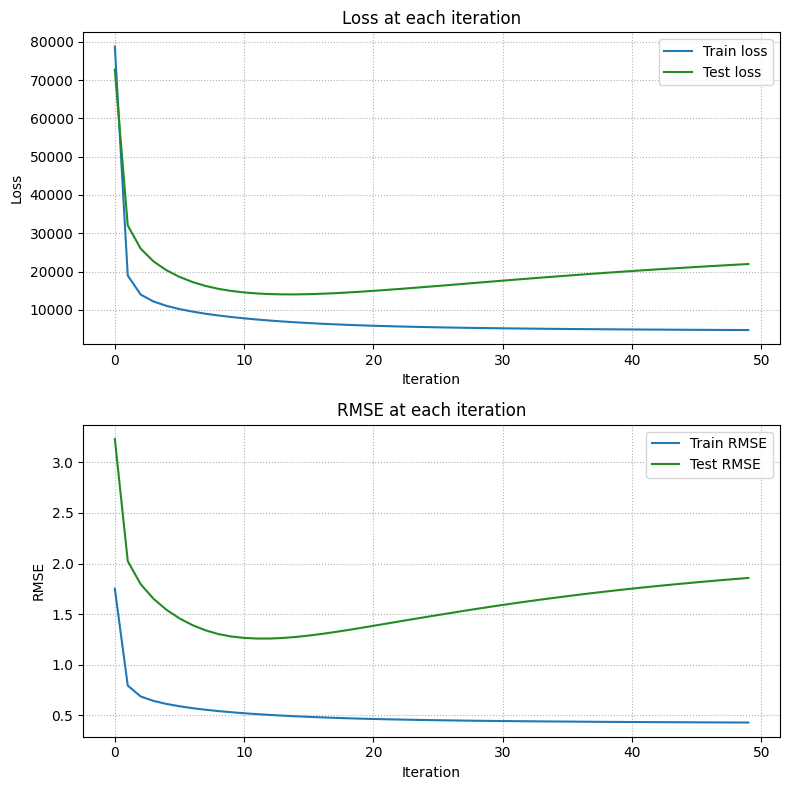

In [7]:
results = train_feat(
    train,
    test,
    metadata,
    embedding_dim = 10, 
    r_lambda = 0.5, 
    r_gamma = 0.1, 
    r_tau = 0.1, 
    n_iter = 50,
)

plot_results_2(results)

### Recommender (variational)

In [8]:
test_split = 0.2

train, test, metadata = train_test_load(
    "../data/ml-latest-small/ratings.csv",
    "../data/ml-latest-small/movies.csv",
    test_split=test_split,
)

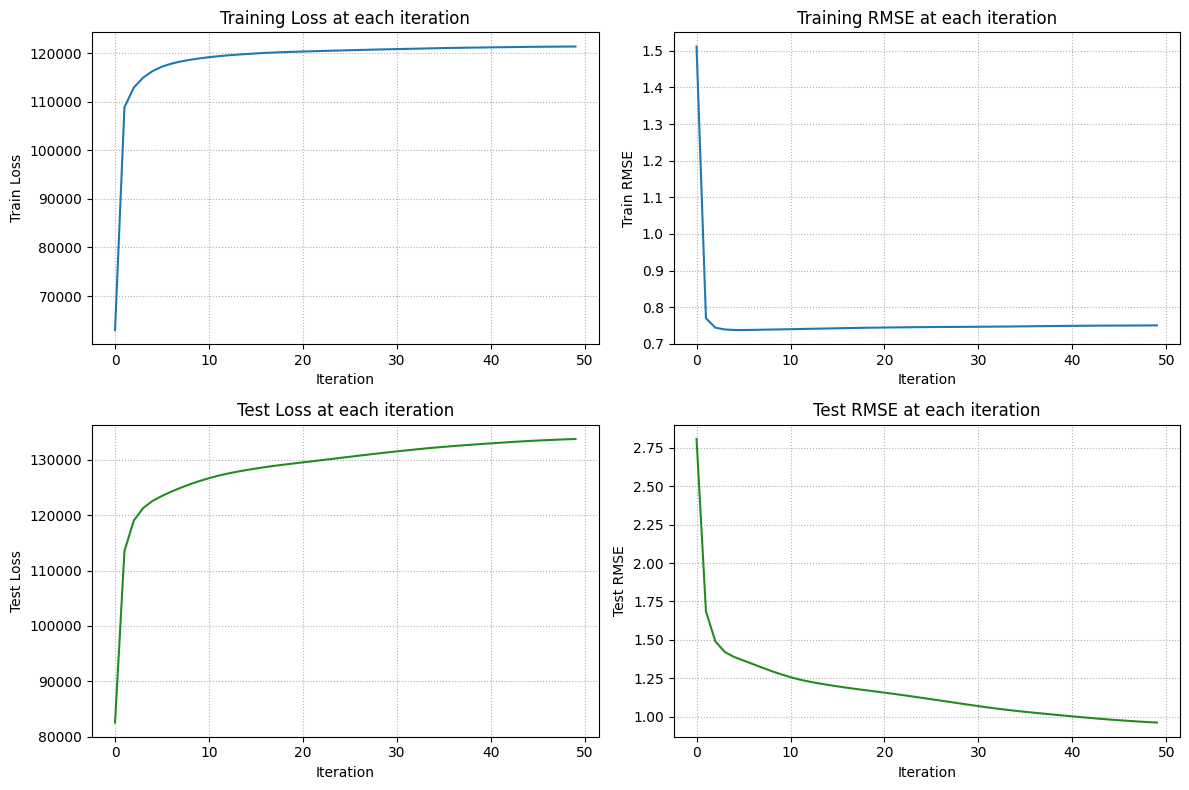

In [9]:
results = train_variational(
    train, test,
    embedding_dim = 10, 
    r_lambda = 0.5, 
    r_gamma = 0.01, 
    r_tau = 0.01, 
    n_iter = 50,
)

plot_results_4(results)

---